In [209]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

house_data = pd.read_csv("/Users/Nicole/Documents/Programs/PluralSight/house-prices.csv")
house_data.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


In [210]:
# delete Home column since it is not needed for analysis
del house_data['Home']

# rename columns
house_data = house_data.rename(columns={'Bedrooms': 'Beds', 'Bathrooms': 'Baths'})

# change values in Brick column to integers for correlation analysis
house_data.loc[:,"Brick"] = house_data.loc[:,"Brick"].apply(lambda x: 1 if x == 'Yes' else 0)
house_data.tail()

,Price,SqFt,Beds,Baths,Offers,Brick,Neighborhood
123,119700,1900,3,3,3,1,East
124,147900,2160,4,3,3,1,East
125,113500,2070,2,2,2,0,North
126,149900,2020,3,3,1,0,West
127,124600,2250,3,3,4,0,North


In [211]:
# check if dataframe has any null values
house_data.isnull().values.any()

False

In [212]:
# make dummy variables for Neighborhood variable
n_list = []
s_list = []
e_list = []
w_list = []
for x in house_data['Neighborhood']:
    if x == "North":
        n_list.append(1)
        s_list.append(0)
        e_list.append(0)
        w_list.append(0)
    elif x == "South":
        n_list.append(0)
        s_list.append(1)
        e_list.append(0)
        w_list.append(0)
    elif x == "East":
        n_list.append(0)
        s_list.append(0)
        e_list.append(1)
        w_list.append(0)
    else:
        n_list.append(0)
        s_list.append(0)
        e_list.append(0)
        w_list.append(1)
print(s_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [213]:
# zero houses are in the South neighborhood, so there will be no South column
house_data['North'] = n_list
house_data['East'] = e_list
house_data['West'] = w_list
house_data.tail()

,Price,SqFt,Beds,Baths,Offers,Brick,Neighborhood,North,East,West
123,119700,1900,3,3,3,1,East,0,1,0
124,147900,2160,4,3,3,1,East,0,1,0
125,113500,2070,2,2,2,0,North,1,0,0
126,149900,2020,3,3,1,0,West,0,0,1
127,124600,2250,3,3,4,0,North,1,0,0


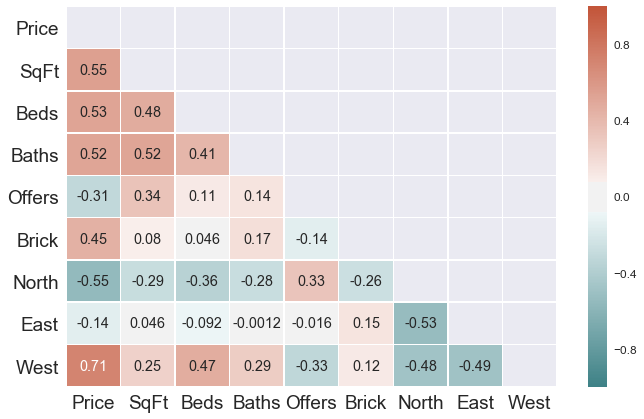

In [234]:
# construct seaborn heatmap to see correlations between attributes
# set color scheme
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)
# set heatmap size
fig, ax = plt.subplots(figsize=(11,7)) 
# set font size
sns.set(font_scale=1.2)
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(house_data.corr(), dtype=bool))
# show heatmap
sns.heatmap(house_data.corr(), mask=mask, annot=True, cmap=cmap, linewidths=.5, ax=ax)
plt.show()

In [216]:
# predict neighborhood based on attributes

from sklearn.cross_validation import train_test_split

# split data into 75% for training and 25% for testing
feature_cols = ['Price','SqFt','Beds','Baths','Brick']
predict_col = ['Neighborhood']
x = house_data[feature_cols].values
y = house_data[predict_col].values
split_test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=5)

# verify that the data was split correctly
print("{0:0.2f}% in training set".format((len(x_train)/len(house_data.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(house_data.index)) * 100))

75.00% in training set
25.00% in test set


In [217]:
# verify that percent of homes in each neighborhood is the same for training and testing data
print("Original North: {0} ({1:0.2f}%)".format(len(house_data.loc[house_data['Neighborhood'] == "North"]), 
                                                (len(house_data.loc[house_data['Neighborhood'] == "North"])/
                                                 len(house_data.index)) * 100.0))
print("Original East: {0} ({1:0.2f}%)".format(len(house_data.loc[house_data['Neighborhood'] == "East"]), 
                                                (len(house_data.loc[house_data['Neighborhood'] == "East"])/
                                                 len(house_data.index)) * 100.0))
print("Original West: {0} ({1:0.2f}%)".format(len(house_data.loc[house_data['Neighborhood'] == "West"]), 
                                                (len(house_data.loc[house_data['Neighborhood'] == "West"])/
                                                 len(house_data.index)) * 100.0))
print("")
print("Training North: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == "North"]), 
                                                (len(y_train[y_train[:] == "North"])/len(y_train) * 100.0)))
print("Training East: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == "East"]), 
                                                (len(y_train[y_train[:] == "East"])/len(y_train) * 100.0)))
print("Training West: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == "West"]), 
                                                (len(y_train[y_train[:] == "West"])/len(y_train) * 100.0)))
print("")
print("Test North: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == "North"]), 
                                                (len(y_test[y_test[:] == "North"])/len(y_test) * 100.0)))
print("Test East: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == "East"]), 
                                                (len(y_test[y_test[:] == "East"])/len(y_test) * 100.0)))
print("Test West: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == "West"]), 
                                                (len(y_test[y_test[:] == "West"])/len(y_test) * 100.0)))

Original North: 44 (34.38%)
Original East: 45 (35.16%)
Original West: 39 (30.47%)

Training North: 32 (33.33%)
Training East: 35 (36.46%)
Training West: 29 (30.21%)

Test North: 12 (37.50%)
Test East: 10 (31.25%)
Test West: 10 (31.25%)


In [218]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [222]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# measure accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6250


In [221]:
# predict values using the testing data
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics

# measure accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.5625
